<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Cross Validation Example 

#### Example of training TMVA using Cross Validation

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.09/03


### Enable JS visualization
To use new interactive features in notebook we have to enable a module called JsMVA. This can be done by using ipython magic: %jsmva.

In [2]:
from IPython.core.extensions import ExtensionManager
ExtensionManager(get_ipython()).load_extension("JsMVA.JsMVAMagic")

In [3]:
%jsmva on

### Provide Input file


In [4]:
inputFile = ROOT.TFile("Higgs_data_small.root")

In [5]:
inputFile.ls()

TFile** Higgs_data_small.root
TFile* Higgs_data_small.root
KEY: TTree sig_tree;1 tree
KEY: TTree bkg_tree;1 tree


## Declare TMVA Factory




In [6]:
TMVA.Tools.Instance();

#optional output file
outputFile = ROOT.TFile("TMVAOutputCV.root", "RECREATE")

factory = TMVA.Factory("TMVAClassification", TargetFile=outputFile,
                       V=False, Color=True, DrawProgressBar=True, Transformations=["I", "D", "P", "G", "D"],
                       AnalysisType="Classification")


## Declare DataLoader

First we need to declare a DataLoader and add the variables (passing the variable names used in the input tree)


In [7]:
loader = TMVA.DataLoader("dataset");

#add variables 
loader.AddVariable("m_jj")
loader.AddVariable("m_jjj")
loader.AddVariable("m_lv")
loader.AddVariable("m_jlv")
loader.AddVariable("m_bb")
loader.AddVariable("m_wbb")
loader.AddVariable("m_wwbb")


## Setup Dataset(s)

To pass the signal and background trees to DataLoader we use the AddSignalTree and AddBackgroundTree functions, and we set up the corresponding DataLoader variable's too. 

In [8]:
mycuts = ROOT.TCut()
mycutb = ROOT.TCut()

tsignal =  inputFile.sig_tree
tbackground =  inputFile.bkg_tree


loader.AddSignalTree    (tsignal,     1.0)   #signal weight  = 1
loader.AddBackgroundTree(tbackground, 1.0);   #background weight = 1 

loader.PrepareTrainingAndTestTree(SigCut=mycuts, BkgCut=mycutb,
                    TrainTestSplit_Signal=0.5, TrainTestSplit_Background=0.5 , SplitMode="Random", NormMode="NumEvents", V=False)
 
##loader.PrepareTrainingAndTestTree(SigCut=mycuts, BkgCut=mycutb,
##                    nTrain_Signal=500, nTrain_Background=500, nTest_Signal=500, nTest_Background=500, SplitMode="Random", NormMode="NumEvents", V=False)

## Run Cross Validation

In [9]:
cv = TMVA.CrossValidation(loader)

In [10]:
cv.BookMethod(TMVA.Types.kBDT, "BDT",
"V:NTrees=850:MinNodeSize=2.5%:MaxDepth=3:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )


In [11]:
tw = ROOT.TStopwatch(); tw.Start()

cv.Evaluate()
tw.Print()

Evaluate method: BDT
Evaluation done.
"Real time 0:00:14, CP time 14.760"


## Cross Validation Result

In [12]:
results=cv.GetResults()
results.Print()


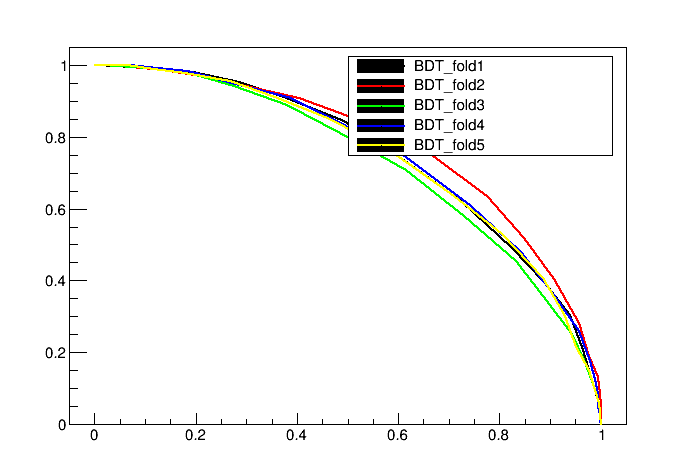

In [13]:
c = ROOT.TCanvas()
results.GetROCCurves().Draw("AL")
c.BuildLegend()
c.Draw()